<a href="https://colab.research.google.com/github/Codebyjanhvi/Data_Analysis_-Projects/blob/main/most_demanded_skills.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **What are the most demanded skills for the top 3 most popular data roles?**

In [ ]:
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("hf://datasets/lukebarousse/data_jobs/data_jobs.csv")


#Data Clean Up
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


# *Filter Data for the United States*

In [ ]:
df_us= df[df['job_location'] == 'United States']

# Explode Skills


Converts the job_skills column from string representations of lists into actual list objects and then expands these lists so each skill appears in its own row. It then displays the job_title and job_skills columns, allowing us to analyze the distribution of skills across different data job titles.

In [ ]:
df_Skills = df_us.explode('job_skills')
df_Skills[['job_title','job_skills']]

,job_title,job_skills
26,Data Engineer,NaN
156,Data Engineer,sql
156,Data Engineer,excel
339,Global Market Leading Energy Firm - Staff Data...,NaN
372,Data Scientist/Analyst,python
...,...,...
785557,"Data Scientist, All Levels",python
785557,"Data Scientist, All Levels",c
785557,"Data Scientist, All Levels",shell
785557,"Data Scientist, All Levels",bash


No charts were generated by quickchart


# **Count Skills per Job Title**

Groups DataFrame by job_skills and job_title_short, counting the occurrences of each skill within each job title. Then resets the index of the Series to turn it back into a DataFrame and renames the series holding the count to 'count'. The final DataFrame, df_skills_count, shows the frequency of each skill with each job title.

In [ ]:
df_Skills_count = df_Skills.groupby(['job_skills','job_title_short']).size()
df_Skills_count = df_Skills_count.reset_index()
df_Skills_count = df_Skills_count.rename(columns={0: 'skill_count'})

df_Skills_count

,job_skills,job_title_short,skill_count
0,airflow,Business Analyst,1
1,airflow,Data Analyst,1
2,airflow,Data Engineer,174
3,airflow,Data Scientist,98
4,airflow,Machine Learning Engineer,3
...,...,...,...
987,yarn,Senior Data Engineer,1
988,zoom,Data Analyst,1
989,zoom,Data Engineer,5
990,zoom,Data Scientist,16


**Create List of Top 4 Roles**

Focus: Data Analysts, Data Engineers, and Data Scientists,Business Analyst
Filter the job titles based on the most popular.

In [ ]:
job_titles = df_Skills_count['job_title_short'].unique().tolist()

job_titles = sorted(job_titles[:3])

job_titles

['Business Analyst', 'Data Analyst', 'Data Engineer']

Plot Skill Counts
Creates a stacked horizontal bar chart for the top 5 skills for Top 3 roles, displaying the frequency of each skill

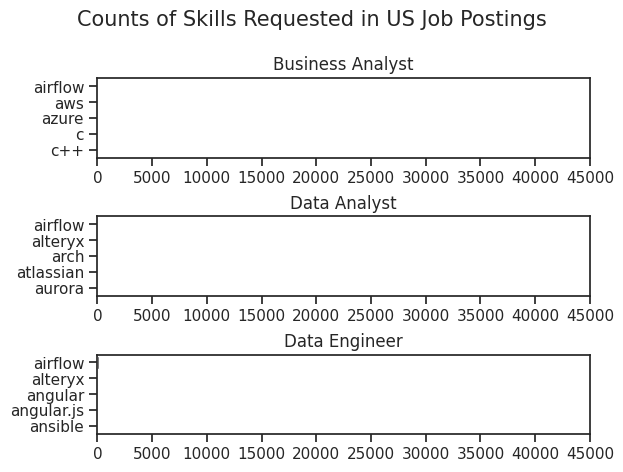

In [ ]:
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_Skills_count[df_Skills_count['job_title_short'] == job_title].head(5)[::-1]
    sns.barplot(data=df_plot, x='skill_count', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 45000) # make the scales the same

fig.suptitle('Counts of Skills Requested in US Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5) # fix the overlap
plt.show()

# **Convert Counts to Percentages**

Focus: Counts don't show what portions of jobs are requesting these skills
So we'll convert the counts into percentages which helps us understand how each job title represents relative to the entire dataset.

Before we can calculate the percentages we need the total counts for the jobs posted by job title. Calculate the frequency of each job title using the value_counts() method on the job_title_short column. Then reset the index to transform the Series into a DataFrame and renames the columns to job_title_short and total. The DataFrame df_job_title_count now holds a list of job titles alongside their total occurrences.

In [ ]:
# Use original df to get the count of job titles
df_job_title_count = df_us['job_title_short'].value_counts().reset_index(name='jobs_total')

df_job_title_count

,job_title_short,jobs_total
0,Data Scientist,4319
1,Data Engineer,1334
2,Senior Data Scientist,1034
3,Senior Data Engineer,334
4,Data Analyst,224
5,Machine Learning Engineer,82
6,Software Engineer,53
7,Senior Data Analyst,51
8,Business Analyst,14
9,Cloud Engineer,9


Then we calculate the percentages. First merge df_skills_count and df_job_title_count, based on the 'job_title_short' column, ensuring each skill count is associated with the total number of job postings for that title. Then calculate the percentage of each skill within its job title by dividing the skill count by the total job postings and multiplying by 100, adding this new data as a 'percentage' column.

In [ ]:
df_skills_perc = pd.merge(df_Skills_count, df_job_title_count, on='job_title_short', how='left')

df_skills_perc['skill_percent'] = (df_skills_perc['skill_count'] / df_skills_perc['jobs_total']) * 100

df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,airflow,Business Analyst,1,14,7.142857
1,airflow,Data Analyst,1,224,0.446429
2,airflow,Data Engineer,174,1334,13.043478
3,airflow,Data Scientist,98,4319,2.269044
4,airflow,Machine Learning Engineer,3,82,3.658537
...,...,...,...,...,...
987,yarn,Senior Data Engineer,1,334,0.299401
988,zoom,Data Analyst,1,224,0.446429
989,zoom,Data Engineer,5,1334,0.374813
990,zoom,Data Scientist,16,4319,0.370456


**Plot Percentage Count**

Filters and sorts a DataFrame to get the top 5 skills percentages for these top 3 roles. After sorting the skills by descending percentage, reverse the order of these top 5 entries to use in a horizontal bar plot, which by default starts plotting from the bottom.

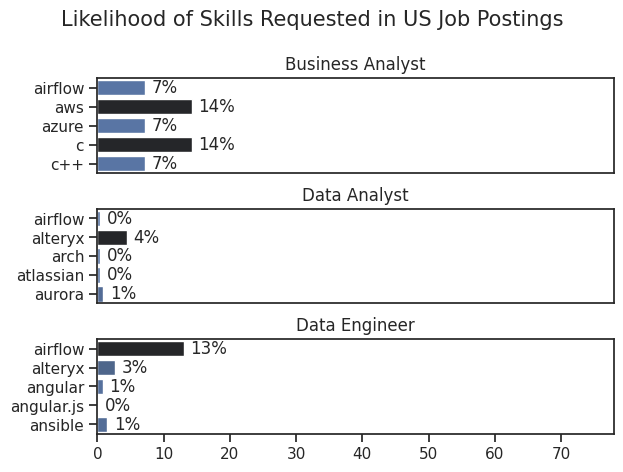

In [ ]:
fig, ax = plt.subplots(len(job_titles), 1)


for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 78)
    # remove the x-axis tick labels for better readability
    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

    # label the percentage on the bars
    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')

fig.suptitle('Likelihood of Skills Requested in US Job Postings', fontsize=15)
fig.tight_layout(h_pad=.8)
plt.show()